<a href="https://colab.research.google.com/github/cweiqiang/wq.github.io/blob/main/Cheatsheet_SQL_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is SQL?

SQL stands for “structured query language”. It is a language used to query,
analyze, and manipulate data from databases. Today, SQL is one of the most
widely used tools in data.

# The different dialects of SQL

Although SQL languages all share a basic structure, some of the specific
commands and styles can differ slightly. 

Popular dialects include MySQL,
SQLite, SQL Server, Oracle SQL, and more. 

PostgreSQL is a good place to start
—since it’s close to standard SQL syntax and is easily adapted to other
dialects. 


# Sample Data

Throughout this cheat sheet, we’ll use the columns listed in this sample table of`airbnb_listings`. The following is based on [Datacamp's cheatsheet on Basic SQL](https://s3.amazonaws.com/assets.datacamp.com/email/other/SQL+for+Data+Science.pdf), with code adapted to run into Google Colab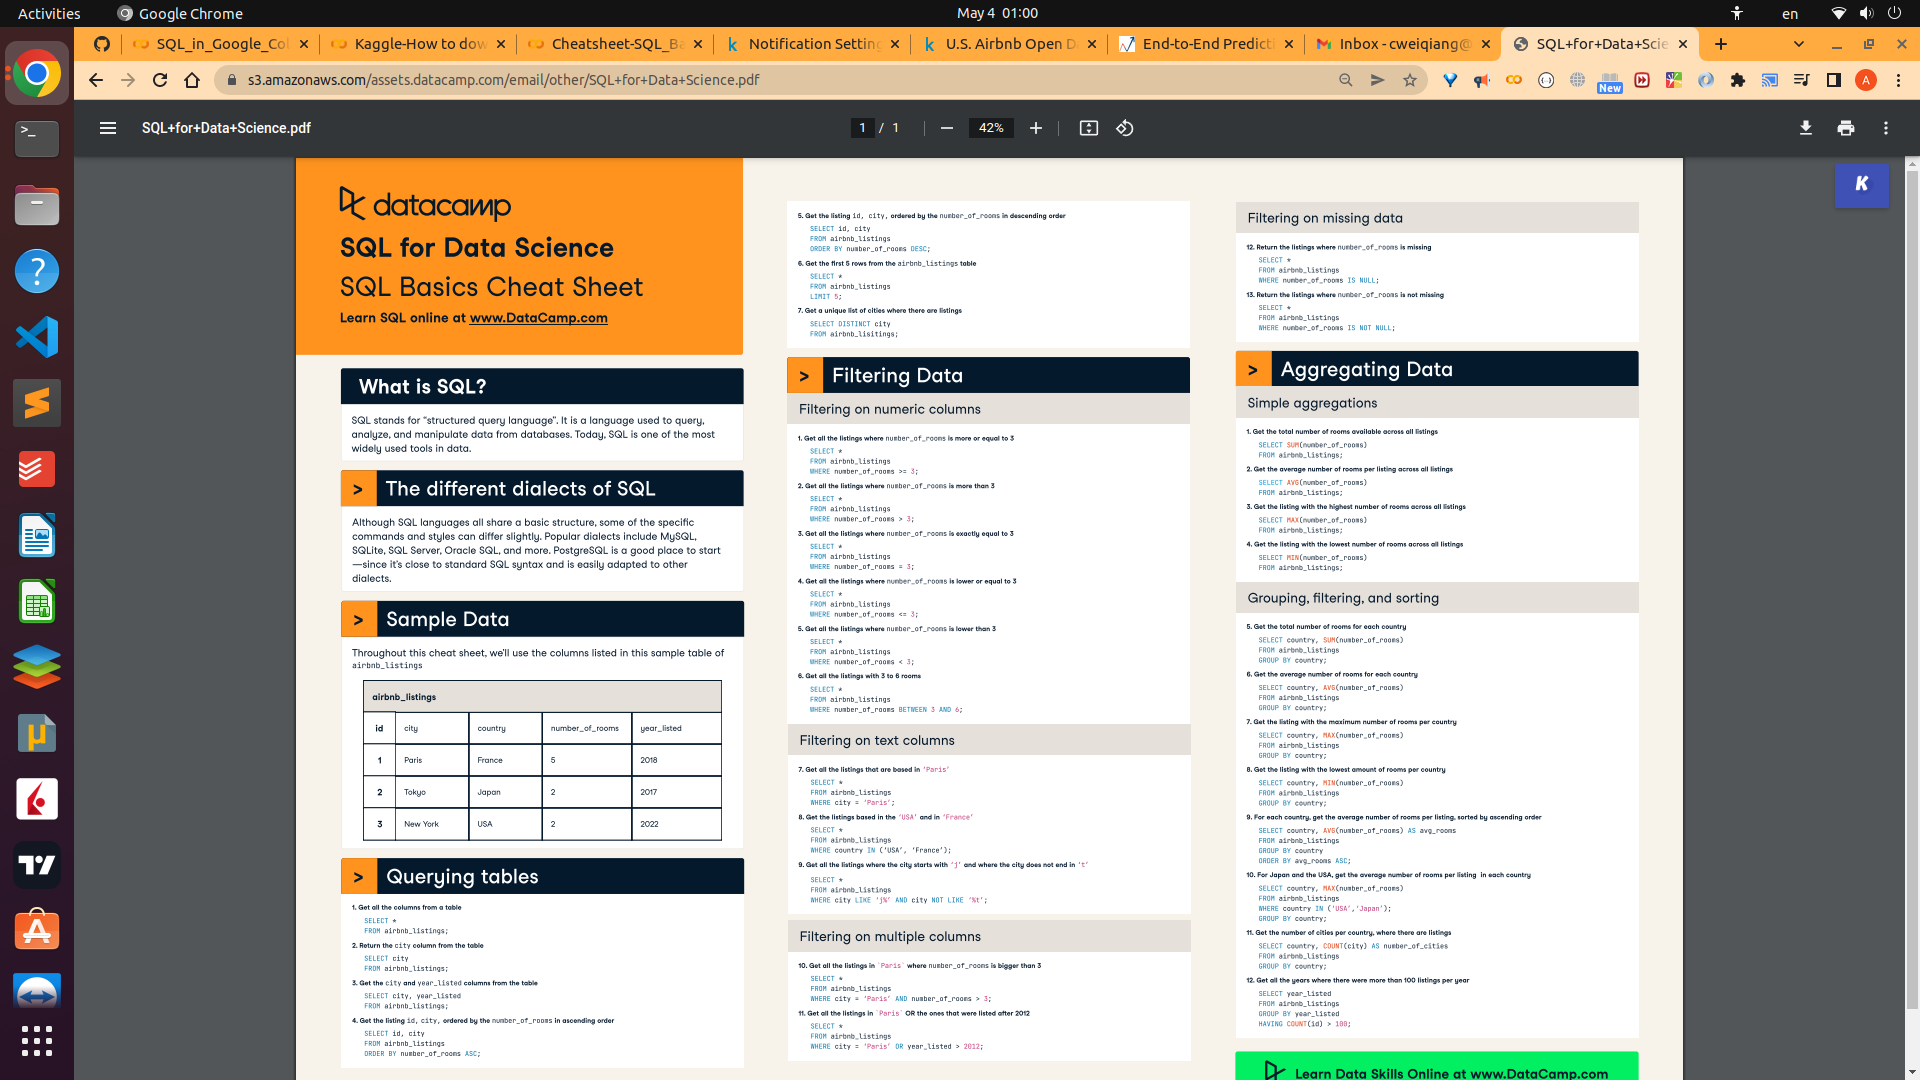

In [6]:
#@title
import pandas as pd
import sqlite3

In [7]:
#@title
def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table

    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created. 
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')
  
    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()


def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe

    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.

    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''    
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

In [27]:
data = {'id' : [1, 2, 3],
        'city': ['Paris', 'Tokyo', 'New York'],
        'country': ['France','Japan','USA'],
        'number_of_rooms': [5, 2, 2],
        'year_listed': [2018, 2017, 2022]}

In [29]:
input_df = pd.DataFrame(data, columns=['id','city', 'country','number_of_rooms','year_listed'])

In [31]:
# Step 1: Read the csv file into a dataframe
# Dataset from https://www.kaggle.com/gpreda/covid-world-vaccination-progress
# input_df = pd.read_csv('country_vaccinations.csv')
 
# Step 2: Upload the dataframe to a SQL Table
pd_to_sqlDB(input_df,
            table_name='airbnb_listings',
            db_name='default2.db')
 
# Step 3: Write the SQL query in a string variable
sql_query_string = """
    SELECT * 
    FROM airbnb_listings
"""
 
# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

2022-05-03 17:15:20 INFO: SQL DB default2.db created
2022-05-03 17:15:20 INFO: SQL Table airbnb_listings created with 5 columns
2022-05-03 17:15:20 INFO: 3 rows uploaded to airbnb_listings


,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018
1,2,Tokyo,Japan,2,2017
2,3,New York,USA,2,2022


# Section 1: Querying tables

### 1.1 Get all the columns from a table

In [32]:
sql_query_string = """
    SELECT * 
    FROM airbnb_listings
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018
1,2,Tokyo,Japan,2,2017
2,3,New York,USA,2,2022


### 1.2. Return the city column from the table



In [33]:
sql_query_string = """
    SELECT city 
    FROM airbnb_listings
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,city
0,Paris
1,Tokyo
2,New York


### 1.3. Get the city and year_listed

In [34]:
sql_query_string = """
    SELECT city, year_listed
    FROM airbnb_listings
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,city,year_listed
0,Paris,2018
1,Tokyo,2017
2,New York,2022


### 1.4. Get the listing id, city, ordered by the number_of_rooms in ascending order



In [35]:
sql_query_string = """
    SELECT id, city 
    FROM airbnb_listings 
    ORDER BY number_of_rooms ASC;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city
0,2,Tokyo
1,3,New York
2,1,Paris


### 1.5 Get the listing id, city, ordered by the number_of_rooms in descending order

In [36]:
sql_query_string = """
    SELECT id, city 
    FROM airbnb_listings 
    ORDER BY number_of_rooms DESC;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city
0,1,Paris
1,2,Tokyo
2,3,New York


### 1.6. Get the first 2 rows from the airbnb_listings table



In [37]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    LIMIT 2;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018
1,2,Tokyo,Japan,2,2017


### 1.7. Get a unique list of cities where there are listings

In [38]:
sql_query_string = """
    SELECT DISTINCT city
    FROM airbnb_listings
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,city
0,Paris
1,Tokyo
2,New York


# Section 2: Filtering Data

## Filtering on numeric columns

### 2.1 Get all the listings where number_of_rooms is more or equal to 3

In [39]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE number_of_rooms >= 3;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018


### 2.2 Get all the listings with 3 to 6 rooms


In [40]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE number_of_rooms BETWEEN 3 AND 6;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018


## Filtering on text columns

### 2.3 Get the listings based in the ‘USA’ and in ‘France’

In [47]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE country IN ('France','USA') ;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018
1,3,New York,USA,2,2022


### 2.4. Get all the listings where the city starts with ‘p’ and where the city does not end in ‘t’

In [51]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE city LIKE 'p%' AND city NOT LIKE '%t';
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018


## Filtering on multiple columns

## 2.5. Get all the listings in `Paris` where number_of_rooms is bigger than 3

In [53]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE city = 'Paris' AND number_of_rooms > 3;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018


## Filtering on missing data

## 2.6. Return the listings where number_of_rooms is /is not missing

In [54]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE number_of_rooms IS NULL;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed


In [55]:
sql_query_string = """
    SELECT *
    FROM airbnb_listings
    WHERE number_of_rooms IS NOT NULL;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,id,city,country,number_of_rooms,year_listed
0,1,Paris,France,5,2018
1,2,Tokyo,Japan,2,2017
2,3,New York,USA,2,2022


# Section 3: Aggregating Data

## Simple aggregations

### 3.1. Get the total number of rooms available across all listings

In [56]:
sql_query_string = """
    SELECT SUM(number_of_rooms)
    FROM airbnb_listings;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,SUM(number_of_rooms)
0,9


### 3.2 Get the average number of rooms per listing across all listings|

In [57]:
sql_query_string = """
    SELECT AVG(number_of_rooms)
    FROM airbnb_listings;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,AVG(number_of_rooms)
0,3.0


### Grouping, filtering, and sorting

### 3.3 For each country, get the average number of rooms per listing, sorted by ascending order

In [58]:
sql_query_string = """
    SELECT country, AVG(number_of_rooms) AS avg_rooms
    FROM airbnb_listings
    GROUP BY country
    ORDER BY avg_rooms ASC;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,country,avg_rooms
0,Japan,2.0
1,USA,2.0
2,France,5.0


### 3.4. For Japan and the USA, get the max number of rooms per listing in each country


In [59]:
sql_query_string = """
    SELECT country, MAX(number_of_rooms)
    FROM airbnb_listings
    WHERE country IN ('USA','Japan')
    GROUP BY country;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,country,MAX(number_of_rooms)
0,Japan,2
1,USA,2


### 3.5. Get the number of cities per country, where there are listings


In [60]:
sql_query_string = """
    SELECT country, COUNT(city) AS number_of_cities
    FROM airbnb_listings
    GROUP BY country;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,country,number_of_cities
0,France,1
1,Japan,1
2,USA,1


### 3.6. Get all the years where there were more than 100 listings per year


In [63]:
sql_query_string = """
    SELECT year_listed
    FROM airbnb_listings
    GROUP BY year_listed
    HAVING COUNT(id) > 0;
"""
result_df = sql_query_to_pd(sql_query_string, db_name='default2.db')
result_df

,year_listed
0,2017
1,2018
2,2022
